# Exploratory Data Analysis(EDA)

## Objective

Analyze performance , risk, and trends of Relaince Industries compared to Nifty 50 using cleaned market data to derive derive business insights for invesment descisions.

In [28]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

### Load dataset

In [29]:
market_df = pd.read_csv(r"C:\Users\sande\OneDrive\Documents\Data science AI&ML\Projects\Projects for Resume\Stock Market Analysis & Forecasting- Project\Data\processed\market_data.csv", parse_dates = ['date'])
market_df.head()

,date,reliance_open,reliance_high,reliance_low,reliance_close,reliance_volume,nifty_open,nifty_high,nifty_low,nifty_close,nifty_volume,reliance_return,nifty_return
0,2021-01-04,904.640696,906.363699,892.352703,902.713623,24513534,14104.34961,14147.95020,13953.75000,14132.90039,495000,0.001686,0.008161
1,2021-01-05,892.806130,899.426244,886.911511,891.491211,24123091,14075.15039,14215.59961,14048.15039,14199.50000,492500,-0.012432,0.004712
2,2021-01-06,891.400457,891.445793,863.854552,867.980774,46401468,14240.95020,14244.15039,14039.90039,14146.25000,632300,-0.026372,-0.003750
3,2021-01-07,870.814696,881.923778,863.854564,866.575134,32325918,14253.75000,14256.25000,14123.09961,14137.34961,559200,-0.001619,-0.000629
4,2021-01-08,869.681241,878.931255,867.006006,876.800110,27540187,14258.40039,14367.29980,14221.65039,14347.25000,613500,0.011799,0.014847


In [30]:
market_df.describe()

,date,reliance_open,reliance_high,reliance_low,reliance_close,reliance_volume,nifty_open,nifty_high,nifty_low,nifty_close,nifty_volume,reliance_return,nifty_return
count,1238,1238.000000,1238.000000,1238.000000,1238.000000,1.238000e+03,1238.000000,1238.000000,1238.000000,1238.000000,1.238000e+03,1238.000000,1238.000000
mean,2023-07-05 13:40:01.938610944,1222.067314,1233.177928,1210.754232,1221.631645,1.393338e+07,20077.278673,20166.003260,19965.733312,20069.169278,3.155379e+05,0.000556,0.000545
min,2021-01-04 00:00:00,843.110037,863.786481,829.779159,835.197693,0.000000e+00,13758.599610,13898.250000,13596.750000,13634.599610,0.000000e+00,-0.074851,-0.059294
25%,2022-04-04 06:00:00,1103.825193,1112.146370,1090.413521,1101.316742,9.037571e+06,17276.962403,17360.562500,17161.175293,17274.800780,2.408500e+05,-0.007956,-0.004039
50%,2023-07-04 12:00:00,1197.291238,1209.112143,1186.569943,1195.702270,1.198693e+07,19058.725585,19127.275390,18956.849610,19063.424805,2.822500e+05,0.000683,0.000565
75%,2024-10-07 18:00:00,1382.894514,1395.426760,1373.548781,1383.879883,1.649305e+07,23695.687012,23804.275390,23530.412110,23666.075195,3.573500e+05,0.008157,0.005602
max,2026-01-05 00:00:00,1593.000000,1611.800049,1580.400024,1592.300049,9.146198e+07,26333.699220,26373.199220,26222.050780,26328.550780,1.103600e+06,0.070192,0.047424
std,NaN,179.688801,180.429358,179.360266,179.935041,7.946944e+06,3591.036122,3599.995726,3589.725388,3593.126991,1.293953e+05,0.014308,0.008804


### Cumulative Returns

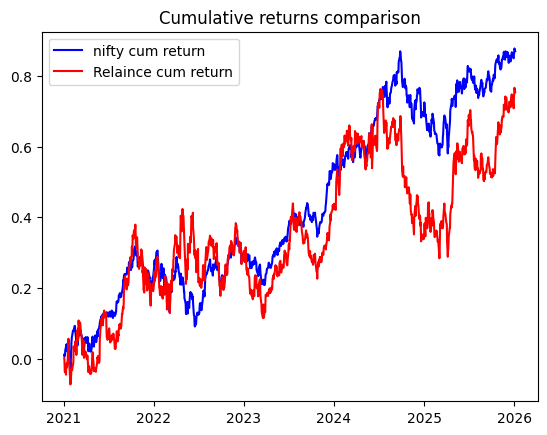

In [31]:

market_df['reliance_cum_return'] = (1+market_df['reliance_return']).cumprod() - 1
market_df['nifty_cum_return'] = (1+market_df['nifty_return']).cumprod() - 1

plt.Figure(figsize=(10,5))
plt.plot(market_df['date'], market_df['nifty_cum_return'],label = 'nifty cum return', color = 'blue')
plt.plot(market_df['date'], market_df['reliance_cum_return'], label= 'Relaince cum return',color = 'red')
plt.legend()
plt.title("Cumulative returns comparison")
plt.show()

Reliance shows strong growth over time but experiences deeper drawdowns compared to NIFTY 50. 
While Reliance outperforms the index during certain periods, NIFTY delivers more stable 
long-term cumulative returns, indicating lower risk.


### Rolling Volatality

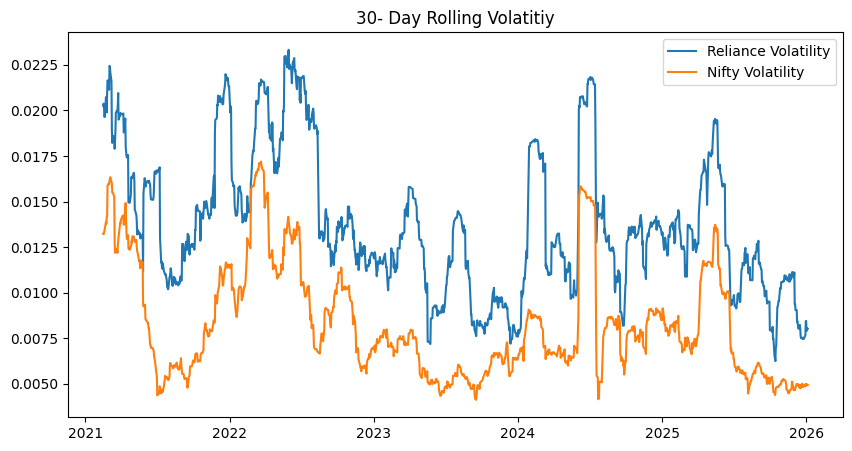

In [32]:
window = 30

market_df['reliance_vol_30d'] = market_df['reliance_return'].rolling(30).std()
market_df['nifty_vol_30d'] = market_df['nifty_return'].rolling(30).std()


plt.figure(figsize = (10,5))
plt.plot(market_df['date'], market_df['reliance_vol_30d'], label = 'Reliance Volatility')
plt.plot(market_df['date'],market_df['nifty_vol_30d'], label = 'Nifty Volatility')
plt.legend()
plt.title('30- Day Rolling Volatitiy')
plt.show()

Reliance exhibits consistently higher 30-day rolling volatility than NIFTY 50, 
indicating higher risk. Volatility spikes suggest sensitivity to market events, 
whereas the index remains comparatively stable.


### Average Returns

In [33]:
market_df[['reliance_return', 'nifty_return']].mean()

reliance_return    0.000556
nifty_return       0.000545
dtype: float64

While Reliance delivers slightly higher average daily returns than NIFTY 50, 
it also experiences higher volatility and trading volume spikes. This reinforces 
the risk–return trade-off observed across the analysis.


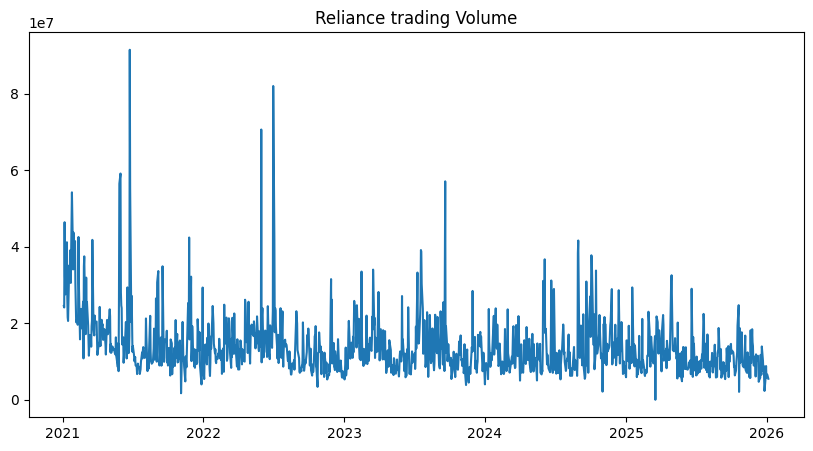

In [34]:
plt.figure(figsize=(10,5))
plt.plot(market_df['date'],market_df['reliance_volume'])
plt.title('Reliance trading Volume')
plt.show()

Reliance trading volume exhibits significant spikes across the period, 
indicating bursts of heightened market activity. These spikes often align 
with periods of increased volatility, suggesting strong investor reaction 
to market events or company-specific news.
